In [6]:
import yfinance as yf
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [11]:
# DescargO los símbolos de todas las acciones del S&P500
sp500_symbols = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Descargo los datos históricos de cada acción y concatenarlos en un solo DataFrame
sp500_history = pd.concat([yf.download(symbol, start='2000-01-01')['Adj Close'].rename(symbol) for symbol in sp500_symbols], axis=1)

# Sumo los valores históricos de todas las acciones
total_historical_value = sp500_history.sum(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
total_historical_value

Date
2000-01-03     7553.814092
2000-01-04     7296.509405
2000-01-05     7340.006890
2000-01-06     7301.578002
2000-01-07     7563.556096
                  ...     
2023-02-22    85532.167096
2023-02-23    85915.553038
2023-02-24    85085.937159
2023-02-27    85440.760305
2023-02-28    85148.862982
Length: 5826, dtype: float64

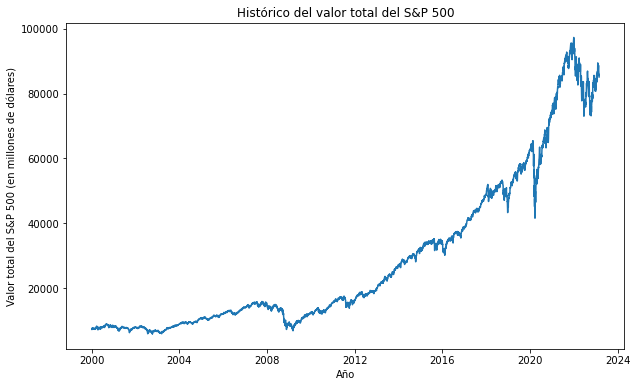

In [91]:
# Creo una figura y agrego un eje
fig, ax = plt.subplots()
# Grafico la suma de los valores históricos
ax.plot(total_historical_value)
plt.gcf().set_size_inches(10,6)
# Agrego etiquetas al eje x, al eje y y al título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Valor total del S&P 500 (en millones de dólares)')
ax.set_title('Histórico del valor total del S&P 500')
# Mostrar el gráfico
plt.show()

In [6]:
# Comparo con un activo refugio de valor
print('Aumento total del precio del oro desde el año 2000: 673,89%')

Aumento total del precio del oro desde el año 2000: 673,89%


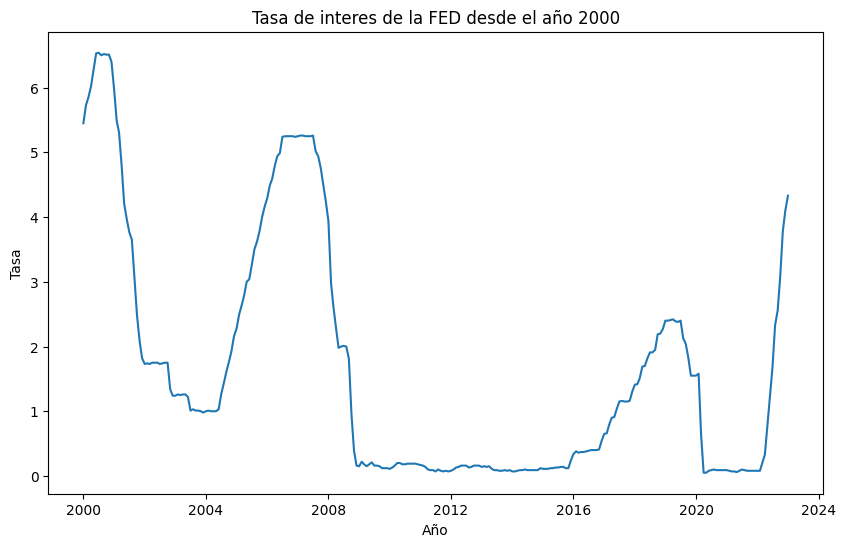

In [25]:
# Inicializo objeto Fred con API key
fred = Fred(api_key= "API_KEY")

# Obtengo datos de la tasa federal de fondos federales (Federal Funds Rate) desde 2000
fedfunds_data = fred.get_series('FEDFUNDS', observation_start='2000-01-01')

# Grafico datos
plt.plot(fedfunds_data)
plt.gcf().set_size_inches(10,6)
plt.title('Tasa de interes de la FED desde el año 2000')
plt.xlabel('Año')
plt.ylabel('Tasa')
plt.show()

Aumento de base monetaria desde el año 2000 a la actualidad: 898,05%


In [64]:
# Calculo la diferencia porcentual para cada columna
porcentaje_aumento = (sp500_history.iloc[-1] / sp500_history.iloc[0] - 1) * 100

# Ordeno por el porcentaje de aumento de forma descendente
porcentaje_aumento = porcentaje_aumento.sort_values(ascending=False)

# Muestro el porcentaje de aumento de cada empresa
print(porcentaje_aumento.head(20))


MNST    112573.077352
ODFL     35065.074885
TSCO     26973.365206
NVDA     25916.508939
AAPL     17146.944731
IDXX     11558.708506
NVR      10922.754824
ANSS     10434.327551
POOL      8932.157600
UNH       8700.382751
AZO       8212.670948
ORLY      7637.860533
HUM       7300.203952
JBHT      6613.900350
BLK       6290.017770
ROST      6242.976843
ATVI      6225.647367
REGN      6048.142053
KMX       5932.000054
GILD      5836.698267
dtype: float64


In [65]:
tickers = ['MNST','ODFL','TSCO','NVDA','AAPL','IDXX','NVR','ANSS','POOL','UNH','AZO','ORLY','HUM','JBHT','BLK','ATVI','ROST','REGN','KMX','GILD']
sp500_data = yf.download(tickers, start='2000-01-01', end='2022-02-13', group_by='ticker')

sectors = {'MNST':'Productos consumibles','ODFL':'Industrial','TSCO':'Consumo minorista','NVDA':'Tecnológico','AAPL':'Tecnológico','IDXX':'Atención sanitaria','NVR':'Consumo minorista','ANSS':'Tecnológico','POOL':'Industrial','UNH':'Atención sanitaria','AZO':'Consumo minorista','ORLY':'Consumo minorista','HUM':'Atención sanitaria','JBHT':'Industrial','BLK':'Servicios Financieros','ATVI':'Servicios de comunicación','ROST':'Consumo minorista','REGN':'Atención sanitaria','KMX':'Consumo minorista','GILD':'Atención sanitaria'}

[*********************100%***********************]  20 of 20 completed


In [66]:
top_companies = ['MNST','ODFL','TSCO','NVDA','AAPL','IDXX','NVR','ANSS','POOL','UNH','AZO','ORLY','HUM','JBHT','BLK','ATVI','ROST','REGN','KMX','GILD']

sectors_count = {}
for company in top_companies:
    sector = sectors[company]
    if sector in sectors_count:
        sectors_count[sector] += 1
    else:
        sectors_count[sector] = 1


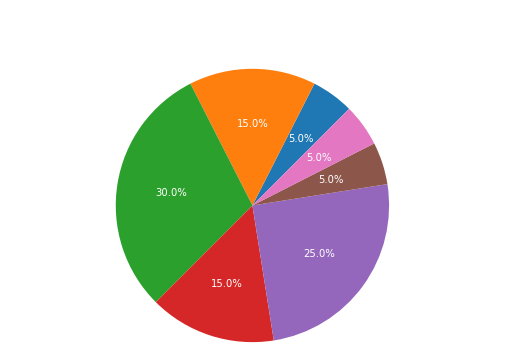

In [67]:
labels = list(sectors_count.keys())
sizes = list(sectors_count.values())

fig1, ax1 = plt.subplots(figsize=(5.5,5.5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.axis('equal')
plt.title('       Sectores de Top 20 empresas del S&P500',color='white', y=1.1, fontsize=18)
for text in ax1.texts:
    text.set_color('white')
plt.show()

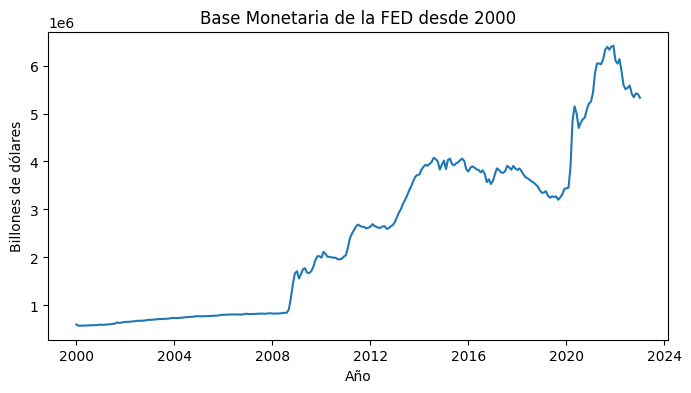

In [30]:
# Descargo los datos de la serie "Base Monetaria"
base_monetaria = fred.get_series('BOGMBASE', observation_start='2000-01-01')

# Creo gráfico
plt.plot(base_monetaria)
plt.gcf().set_size_inches(8,4)
plt.title('Base Monetaria de la FED desde 2000')
plt.xlabel('Año')
plt.ylabel('Billones de dólares')
plt.show()

In [102]:
# Calculo el porcentaje de aumento del S&P500
inicio_sp500 = total_historical_value.iloc[0]
final_sp500 = total_historical_value.iloc[-1]
porcentaje_aumento_sp500 = ((final_sp500 - inicio_sp500) / inicio_sp500) * 100

print(f'Porcentaje de aumento del S&P500 desde 2000: {porcentaje_aumento_sp500:.2f}%')

Porcentaje de aumento del S&P500 desde 2000: 1026.32%


In [103]:
# Calculo el porcentaje de aumento de la base monetaria
inicio_base_monetaria = base_monetaria.iloc[0]
final_base_monetaria = base_monetaria.iloc[-1]
porcentaje_cambio_base_monetaria = ((final_base_monetaria - inicio_base_monetaria) / inicio_base_monetaria) * 100

print(f'Porcentaje de aumento de la base monetaria desde 2000: {porcentaje_cambio_base_monetaria:.2f}%')


Porcentaje de aumento de la base monetaria desde 2000: 798.06%


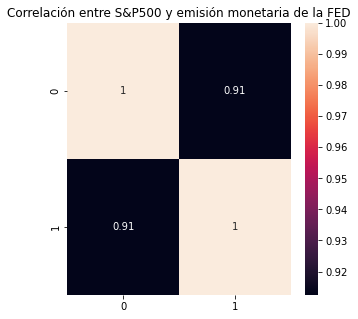

In [79]:
# Uno ambos DataFrames
df2 = pd.concat([total_historical_value, base_monetaria], axis=1)

# Grafico la correlación
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), annot=True)
plt.title('Correlación entre S&P500 y emisión monetaria de la FED')
plt.show()  

In [99]:
# Calculo la media y la desviación estándar de la serie "fed_data"
fed_mean = np.mean(base_monetaria)
fed_std = np.std(base_monetaria)

# Estandarizo la serie "fed_data"
fed_data_std = (base_monetaria - fed_mean) / fed_std

# Calculo la media y la desviación estándar de la serie "sp500_data"
sp500_mean = np.mean(total_historical_value)
sp500_std = np.std(total_historical_value)

# Estandarizo la serie "sp500_data"
sp500_data_std = (total_historical_value - sp500_mean) / sp500_std


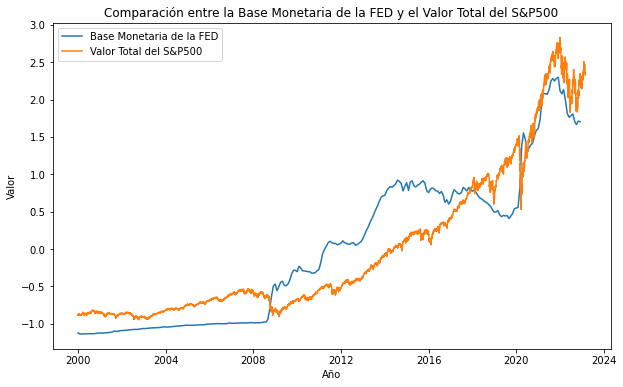

In [100]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fed_data_std.index, fed_data_std, label='Base Monetaria de la FED')
ax.plot(sp500_data_std.index, sp500_data_std, label='Valor Total del S&P500')

ax.set_xlabel('Año')
ax.set_ylabel('Valor')
ax.set_title('Comparación entre la Base Monetaria de la FED y el Valor Total del S&P500')

ax.legend()

plt.show()


In [13]:
# Convierto total_historical_value en un dataframe
total_historical_value_df = pd.DataFrame(total_historical_value, columns=['Total Value'])

# Descargo el dataframe en formato csv
total_historical_value_df.to_csv('total_historical_value.csv', index=True)
sp500_history.to_csv('sp500_history.csv')